In [ ]:
import torch as t
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
train_dataset=torchvision.datasets.MNIST(root='./data',train=True,download=True,transform=transform)
test_dataset=torchvision.datasets.MNIST(root='./data',train=False,download=True,transform=transform)

image,label=train_dataset[0]
print("Image shape:",image.shape)
print("Number of training samples:",len(train_dataset))

image,label=test_dataset[0]
print("Image shape:",image.shape)
print("Number of testing samples:",len(test_dataset))
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)


Image shape: torch.Size([1, 28, 28])
Number of training samples: 60000
Image shape: torch.Size([1, 28, 28])
Number of testing samples: 10000


In [ ]:
class CNNClassifier(nn.Module):
  def __init__(self):
    super(CNNClassifier,self).__init__()
    self.conv1=nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3,padding=1)
    self.conv2=nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,padding=1)
    self.conv3=nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,padding=1)
    self.pool=nn.MaxPool2d(kernel_size=2,stride=2)
    self.fc1=nn.Linear(128*3*3,128)
    self.fc2=nn.Linear(128,64)
    self.fc3=nn.Linear(64,10)

  def forward(self,x):
    x=self.pool(t.relu(self.conv1(x)))
    x=self.pool(t.relu(self.conv2(x)))
    x=self.pool(t.relu(self.conv3(x)))
    x=x.view(x.size(0),-1)
    x=nn.functional.relu(self.fc1(x))
    x=nn.functional.relu(self.fc2(x))
    x=self.fc3(x)
    return x

from torchsummary import summary
model=CNNClassifier()
if t.cuda.is_available():
  device=t.device("cuda")
  model.to(device)
print("Name: Vikaash K S")
print("Reg.no: 212223240179")
summary(model,input_size=(1,28,28))
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)


Name: Vikaash K S
Reg.no: 212223240179
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
            Conv2d-3           [-1, 64, 14, 14]          18,496
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Conv2d-5            [-1, 128, 7, 7]          73,856
         MaxPool2d-6            [-1, 128, 3, 3]               0
            Linear-7                  [-1, 128]         147,584
            Linear-8                   [-1, 64]           8,256
            Linear-9                   [-1, 10]             650
Total params: 249,162
Trainable params: 249,162
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.42
Params size (MB): 0.95
Estimated Total Size (MB): 1.37
----

In [ ]:
def train_model(model,train_loader,num_epochs):
  for epoch in range(num_epochs):
    model.train()
    running_loss=0.0
    for images,labels in train_loader:
      if t.cuda.is_available():
        images,labels=images.to(device),labels.to(device)
      optimizer.zero_grad()
      outputs=model(images)
      loss=criterion(outputs,labels)
      loss.backward()
      optimizer.step()
      running_loss+=loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")
print("Name: Vikaash K S")
print("Reg.no: 212223240179")

train_model(model,train_loader,num_epochs=10)

Name: Vikaash K S
Reg.no: 212223240179
Epoch [1/10], Loss: 0.1622
Epoch [2/10], Loss: 0.0469
Epoch [3/10], Loss: 0.0335
Epoch [4/10], Loss: 0.0270
Epoch [5/10], Loss: 0.0218
Epoch [6/10], Loss: 0.0179
Epoch [7/10], Loss: 0.0150
Epoch [8/10], Loss: 0.0142
Epoch [9/10], Loss: 0.0110
Epoch [10/10], Loss: 0.0114


Name: Vikaash K S
Register No: 212223240179
Test Accuracy: 0.9879
Name: Vikaash K S
Register No: 212223240179


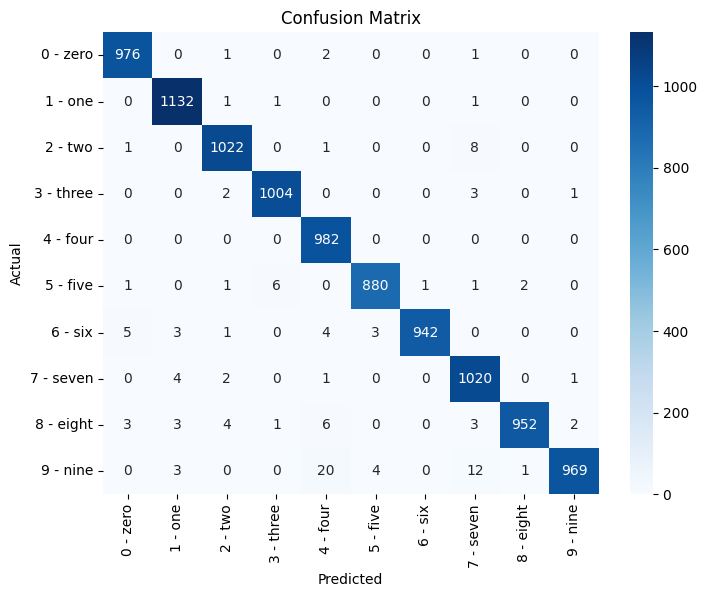

Name: Vikaash K S
Register No: 212223240179
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.97      1.00      0.98       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       1.00      0.98      0.99       974
           9       1.00      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
def test_model(model, test_loader):
  model.eval()
  correct = 0
  total = 0
  all_preds = []
  all_labels = []
  with t.no_grad():
    for images, labels in test_loader:
      if t.cuda.is_available():
        images, labels = images.to(device), labels.to(device)

      outputs = model(images)
      _, predicted = t.max(outputs, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      all_preds.extend(predicted.cpu().numpy())
      all_labels.extend(labels.cpu().numpy())

  accuracy = correct/total
  print("Name: Vikaash K S")
  print("Register No: 212223240179")
  print(f"Test Accuracy: {accuracy:.4f}")

  cm = confusion_matrix(all_labels, all_preds)
  plt.figure(figsize=(8, 6))
  print("Name: Vikaash K S")
  print("Register No: 212223240179")
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

  print("Name: Vikaash K S")
  print("Register No: 212223240179")
  print("Classification Report:")
  print(classification_report(all_labels, all_preds, target_names=[str(i) for i in range(10)]))
test_model(model, test_loader)

Name: Vikaash K S
Reg no: 212223240179


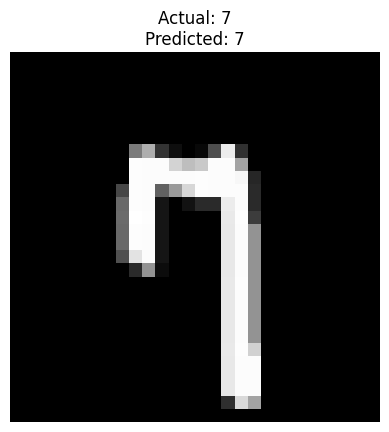

Actual: 7
Predicted: 7


In [ ]:
def predict_image(model,image_index,dataset):
  model.eval()
  image,label=dataset[image_index]
  if t.cuda.is_available():
    image=image.to(device)

  with t.no_grad():
    output=model(image.unsqueeze(0))
    _,predicted=t.max(output,1)
  class_names=[str(i) for i in range(10)]
  print("Name: Vikaash K S")
  print("Reg no: 212223240179")
  plt.imshow(image.cpu().squeeze(0),cmap='gray')
  plt.title(f"Actual: {class_names[label]}\nPredicted: {class_names[predicted.item()]}")
  plt.axis("off")
  plt.show()
  print(f"Actual: {class_names[label]}\nPredicted: {class_names[predicted.item()]}")
predict_image(model,image_index=80,dataset=test_dataset)